In [20]:
from pymongo import MongoClient
import pymongo
from pprint import pprint
import pandas as pd
import json
import re
from bson.objectid import ObjectId
import matplotlib.pyplot as plt
import numpy as np
pymongo.version

'4.10.1'

### WORKBOOK II SUMMARY<br>Objectives: 
1. Recast the historic election csv data into a more granualar mongodb database. The data is contained ina single COLLECTION ('deepElectionResults') with three levels, national, state and county, organized into a set of thirty-nine election years.<br>
![Structure of deep historic election results DB](images/MongoDeepDBStructure.png)
2. Create and test a set of utility functions to easily extract various data sets from the database. These are listed in the next section.
3. Prototype a dynamic plot to analyze state versus nationation voting trends. Exactly analogous methods can be deployed for county versus national and county versus state trends. This figure illustrates the selection and display of republican and democrat proportional vote the state of Illinois versus the national proportional vote. For example, the graph shows that in the 1920 and 1924 elections, the proportional divison of votes by party was more extreme in Illinois than for the nation as a whole. <br>
![Illustration of Dynamic Plotley Graph](images/proposedPercentVoteFigure.png)

### FUNCTIONS

#### List of Utility Functions
1. checkValidStateAndCountyNameForOneElection(electionDict, state, county, states_list)
2. getAllElectionYearsList(collection)
3. getAllElectionYearsAsStingsList(collection)
4. getAll_IdObjectsList(collection)
5. getAllStatesList(this_election)
6. getCountyListForAStateForOneElection(electionDict, state)
7. getDemVotesByStateForOneElection(electionDic
8. getElectionYearToIdDict(collection)
9. getNationalDemCandidate(electionDict)
10. getNationalDemVote(electionDict)
11. getNationalPercentVoteByYearByParty(collection)
12. getNationalRepCandidate(electionDict)
13. getNationalRepVote(electionDict)
14. getOneCountyDemVote(electionDict, state, county, states_list)
15. getOneCountyRepVote(electionDict, state, county, states_list)
16. getOneStateDemVote(electionDict, state)
17. getOneStateRepVote(electionDict, state)
18. getProportionalNationalVoteByPartyForOneElection
19. getProportionalStateVoteByPartyForOneElection(electionDict)
20. getRepVotesByStateForOneElection(electionDict)
21. getStatePercentVoteByYearByParty(collection, state)
22. getTotalNumberOfDocuments(data)
23. plotProportionalVoteByPartyForOneState(electionDict, state)

#### FUNCTION: checkValidStateAndCountyNameForOneElection(electionDict, state, county)<br>PARAMETER: an election dictionary<br>RETURNS: a string

In [27]:
def checkValidStateAndCountyNameForOneElection(electionDict, state, county):
    
    all_states_list_this_election = getAllStatesList(electionDict)
    # check if valid state
    if state not in all_states_list_this_election:
        return 'check state name'
    else:
        county_list = list(election_2020['states'][state]['counties'].keys())
        if county in county_list:
            resultString = county + ' is valid'
            return resultString
        else:
            resultString = county + ' is not valid. All Caps? eg: "COOK"'
            return resultString

#### FUNCTION: getAllElectionYearsList(collection)<br>PARAMETER: collection<br>RETURNS: a list of integers

In [262]:
def getAllElectionYearsList(collection):
    cursor = collection.find({})
    id_string_list = []
    for document in cursor:
        _id = document['_id']
        id_string_list.append(_id)
    
    all_election_years_list = []
    for objIDstring in id_string_list:
        object_id = ObjectId(objIDstring)
        this_year = deepElectionResults.find_one({"_id": object_id})['election_year']
        all_election_years_list.append(this_year)

    unique_years=[]
    for yr in all_years:
        if yr not in unique_years:
            unique_years.append(yr)
    
    return unique_years

#### FUNCTION: getAllElectionYearsAsStringsList(collection)<br>PARAMETER: collection<br>RETURNS: a list of strings

In [265]:
def getAllElectionYearsAsStringsList(collection):
    all_election_years_list = getAllElectionYearsList(collection)
    all_election_years_as_strings_list = [str(year) for year in all_election_years_list]
    return all_election_years_as_strings_list

#### FUNCTION: getAll_IdObjectsList(collection)<br>PARAMETER: a collection<br>RETURNS: a list

In [33]:
def getAll_IdObjectsList(collection):
    cursor = collection.find({})
    id_string_list = []
    for document in cursor:
        _id = document['_id']
        id_string_list.append(_id)
    
    ObjectId_list=[]
    for objIDstring in id_string_list:
        object_id = ObjectId(objIDstring)
        ObjectId_list.append(object_id)
        
    return ObjectId_list

#### FUNCTION: getAllStatesList(this_election)<br>PARAMETER: an election dictionary<br>RETURNS: a list

In [36]:
def getAllStatesList(this_election):
    all_state_dict = this_election['states']
    states_list = list(all_state_dict.keys())
    return states_list

#### FUNCTION: getCountyListForAStateForOneElection(electionDict, state)<br>PARAMETER: an election dictionary, a state<br>RETURNS: a list

In [39]:
def getCountyListForAStateForOneElection(electionDict, state):
    county_list = list(electionDict['states'][state]['counties'].keys())
    return county_list

#### FUNCTION: getDemVotesByStateForOneElection(electionDict)<br>PARAMETER: an election dictionary<br>RETURNS: an interger

In [42]:
def getDemVotesByStateForOneElection(electionDict):
    
    all_states_list_this_election = getAllStatesList(electionDict)
    
    dem_vote_by_state = {}
    for state in all_states_list_this_election:
        dem_vote = electionDict['states'][state]['state_dem_vote']
        dem_vote_by_state[state] = dem_vote
        
    return dem_vote_by_state

#### FUNCTION: getElectionYearToIdDict(collection)<br>PARAMETER: a collection<br>RETURNS: a dictionary

In [45]:
def getElectionYearToIdDict(collection):
    cursor = collection.find({})
    id_string_list = []
    for document in cursor:
        _id = document['_id']
        id_string_list.append(_id)
    
    electionToIdDict={}
    for objIDstring in id_string_list:
        object_id = ObjectId(objIDstring)
        this_year = deepElectionResults.find_one({"_id": object_id})['election_year']  
        electionToIdDict[this_year] = objIDstring
        
    return electionToIdDict

#### FUNCTION: getNationalDemCandidate(electionDict)<br>PARAMETER: an election dictionary<br>RETURNS: a string

In [48]:
def getNationalDemCandidate(electionDict):
    national_rep_candidate = electionDict['total_national_rep_votes'] 
    return national_rep_candidate

#### FUNCTION: getNationalDemVote(electionDict)<br>PARAMETER: an election dictionary<br>RETURNS: an integer

In [51]:
def getNationalDemVote(electionDict):
    nationalDemVote = electionDict['total_national_dem_votes']  
    return nationalDemVote

#### FUNCTION: getNationalPercentVoteByYearByParty(collection)<br>PARAMETER: a collection<br>RETURNS: a dictionary

In [54]:
def getNationalPercentVoteByYearByParty(collection):

    # get all the ObjectIds
    ObjectId_list = getAll_IdObjectsList(collection)
    
    nationalVotePercentByYearByParty = {}
    # loop through and calculate dem and rep proportions
    for objId in ObjectId_list:
        
        this_election = deepElectionResults.find_one({"_id": objId})
        year = this_election['election_year']
        year_string = str(year)
       
        vote_percentages = getProportionalNationalVoteByPartyForOneElection(this_election)
        dem_percent = vote_percentages['dem_percent']
        rep_percent = vote_percentages['rep_percent']
        
        nationalVotePercentByYearByParty[year_string] = { 'dem_percent': dem_percent,'rep_percent':rep_percent}
        
    return nationalVotePercentByYearByParty

#### FUNCTION: getNationalRepCandidate(electionDict)<br>PARAMETER: an election dictionary<br>RETURNS: a string

In [57]:
def getNationalRepCandidate(electionDict):
    national_dem_candidate = electionDict['total_national_dem_votes'] 
    return national_dem_candidate

#### FUNCTION: getNationalRepCandidate(electionDict)<br>PARAMETER: an election dictionary<br>RETURNS: a string

In [60]:
def getNationalRepVote(electionDict):
    nationalRepVote = electionDict['total_national_rep_votes']  
    return nationalRepVote

#### FUNCTION: getOneCountyDemVote(electionDict, state, county)<br>PARAMETER: an election dictionary, a state, a county<br>RETURNS: an integer

In [63]:
def getOneCountyDemVote(electionDict, state, county):

    all_states_list_this_election = getAllStatesList(electionDict)
    if state in all_states_list_this_election:
        countyDemVote = electionDict['states'][state]['counties'][county]['county_dem_vote']
        return countyDemVote
    else:
        return 'check state name'

#### FUNCTION: getOneCountyRepVote(electionDict, state, county)<br>PARAMETER: an election dictionary, a state, a county<br>RETURNS: an integer

In [66]:
def getOneCountyRepVote(electionDict, state, county):
    
    all_states_list_this_election = getAllStatesList(electionDict)
    if state in all_states_list_this_election:
        countyRepVote = electionDict['states'][state]['counties'][county]['county_rep_vote']  
        return countyRepVote
    else:
        return 'check state name'

#### FUNCTION: getOneStateDemVote(electionDict, state)<br>PARAMETER: an election dictionary, a state<br>RETURNS: an integer

In [69]:
def getOneStateDemVote(electionDict, state):
    states_list_this_election = getAllStatesList(electionDict)
    if state in states_list_this_election:
        stateDemVote = electionDict['states'][state]['state_dem_vote']  
        return stateDemVote
    else:
        return 'check state name'

#### FUNCTION: getOneStateRepVote(electionDict, a state)<br>PARAMETER: an election dictionary, a state<br>RETURNS: an integer

In [72]:
def getOneStateRepVote(electionDict, state):
    states_list_this_election = getAllStatesList(electionDict)
    if state in states_list_this_election:
        stateRepVote = electionDict['states'][state]['state_rep_vote']  
        return stateRepVote
    else:
        return 'check state name'

#### FUNCTION: getProportionalNationalVoteByPartyForOneElection(electionDict)<br>PARAMETER: an election dictionary, a state<br>RETURNS: a dictionary

In [75]:
def getProportionalNationalVoteByPartyForOneElection(electionDict):
    
    nationalRepVote = getNationalRepVote(electionDict)
    nationalDemVote = getNationalDemVote(electionDict)

    proportionRep = round( nationalRepVote / (nationalDemVote + nationalRepVote), 2)
    proportionDem = round( nationalDemVote / (nationalDemVote + nationalRepVote), 2)

    proportionalVote = {
        'rep_percent': proportionRep,
        'dem_percent': proportionDem
    }

    return proportionalVote

#### FUNCTION: getProportionalStateVoteByPartyForOneElection(electionDict)<br>PARAMETER: an election dictionary, a state<br>RETURNS: a dictionary

In [78]:
def getProportionalStateVoteByPartyForOneElection(electionDict, state):
    
    stateRepVote = getOneStateRepVote(electionDict, state)
    stateDemVote = getOneStateDemVote(electionDict, state)

    proportionRep = round( stateRepVote / (stateDemVote + stateRepVote), 2)
    proportionDem = round( stateDemVote / (stateDemVote + stateRepVote), 2)

    proportionalVote = {
        'rep_percent': proportionRep,
        'dem_percent': proportionDem
    }

    return proportionalVote

#### FUNCTION: getRepVotesByStateForOneElection(electionDict)<br>PARAMETER: an election dictionary<br>RETURNS: an interger

In [81]:
def getRepVotesByStateForOneElection(electionDict):
    
    all_states_list_this_election = getAllStatesList(electionDict)
    
    rep_vote_by_state = {}
    for state in all_states_list_this_election:
        rep_vote = electionDict['states'][state]['state_rep_vote']
        rep_vote_by_state[state] = rep_vote
        
    return rep_vote_by_state

#### FUNCTION: getStatePercentVoteByYearByParty(collection)<br>PARAMETER: a collection<br>RETURNS: a dictionary

In [84]:
def getStatePercentVoteByYearByParty(collection, state):
    
    # get all the ObjectIds
    ObjectId_list = getAll_IdObjectsList(deepElectionResults)
    
    stateVotePercentByYearByParty = {}
    # loop through and calculate dem and rep proportions
    for objId in ObjectId_list:
        
        this_election = deepElectionResults.find_one({"_id": objId})
        year = this_election['election_year']
        year_string = str(year)
       
        vote_percentages = getProportionalStateVoteByPartyForOneElection(this_election, state)
        dem_percent = vote_percentages['dem_percent']
        rep_percent = vote_percentages['rep_percent']
        
        stateVotePercentByYearByParty[year_string] = { 'dem_percent': dem_percent,'rep_percent':rep_percent}
    
    return stateVotePercentByYearByParty

#### FUNCTION: getTotalNumberOfDocuments(data)<br>PARAMETER: a mongo db object<br>RETURNS: an integer

In [136]:
def getTotalNumberOfDocuments(data):
    count = 0
    for key, value in data.items():
        if isinstance(value, dict):
            count += getTotalNumberOfDocuments(value)
        else:
            count += 1
    return count

#### FUNCTION: plotProportionalVoteByPartyForOneState(electionDict, state)<br>PARAMETERS: an election dictionary, a state<br>RETURNS: code for a plot

In [302]:
def plotProportionalVoteByPartyForOneState(collection, electionDict, state):

    #election_years = [1868, 1872, 1876, 1880, 1884, 1888, 1892, 1896, 1900, 1904, 1908, 1912, 1916, 1920, 1924, 1928, 1932, 1936, 1940, 1944, 1948,1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
    #election_year_strings = ['1868', '1872', '1876', '1880', '1884', '1888', '1892', '1896', '1900', '1904', '1908', '1912', '1916', '1920', '1924', '1928', '1932', '1936', '1940', '1944', '1948','1952', '1956', '1960', '1964', '1968', '1972', '1976', '1980', '1984', '1988', '1992', '1996', '2000', '2004', '2008', '2012', '2016', '2020']
    election_years=[]
    election_year_strings =[]
    election_years        = getAllElectionYearsList(collection)
    election_year_strings = getAllElectionYearsAsStringsList(collection)

    nationalVotePercentByYearByParty = getNationalPercentVoteByYearByParty(collection)
    #years_list = nationalVotePercentByYearByParty.keys()
    national_rep_percent_list=[]
    national_dem_percent_list=[]
    for year in election_year_strings:
        national_rep_percent_list.append(nationalVotePercentByYearByParty[year]['rep_percent'])
        national_dem_percent_list.append(nationalVotePercentByYearByParty[year]['dem_percent'])

    stateVotePercentByYearByParty = getStatePercentVoteByYearByParty(collection, state)
    #years_list = stateVotePercentByYearByParty.keys()
    state_rep_percent_list=[]
    state_dem_percent_list=[]
    for year in election_year_strings:
        state_rep_percent_list.append(stateVotePercentByYearByParty[year]['rep_percent'])
        state_dem_percent_list.append(stateVotePercentByYearByParty[year]['dem_percent'])
    
    x = election_years
    y_1 = state_rep_percent_list
    y_2 = state_dem_percent_list
    y_3 = national_rep_percent_list
    y_4 = national_dem_percent_list

    this_state = state
    plt.axhline(y = 0.5, color = 'grey', linestyle = '-', linewidth=0.5  )
    label_1 = 'republican-state: '+ state
    label_2 = 'democrat-state: '+ state
    plt.plot(x, y_1, label = label_1, linewidth= 1.0)
    plt.plot(x, y_2, label = label_2 ,linewidth= 1.0 )
    plt.plot(x, y_3, label = 'republican-national', linestyle = 'dashed', linewidth= 1.0)
    plt.plot(x, y_4, label = 'democrat-national',linestyle = 'dashed', linewidth= 1.0 )
    titleString = 'Percent Democrat and Republican Vote, National and '+ this_state

    plt.xticks(election_years, election_year_strings, fontsize=6, rotation = 50)
    plt.xlabel('election years')
    plt.ylabel('percent of total vote')
    plt.title(titleString)
    plt.legend()

    return plt

### Set up database

#### Bind 'mongo' variable to MongoClient
#### Note: move to same directory as input json file

In [100]:
mongo = pymongo.MongoClient()

#### Create a Database and Bind it to the 'db' variable

In [125]:
db = mongo['deepHistoricElectionResultstDB']

#### Create a Collection and Bind It To 'electionResults' variable

In [128]:
deepElectionResults = db['deepElectionResults']
print(db.list_collection_names)

<bound method Database.list_collection_names of Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'deepHistoricElectionResultstDB')>


#### Read JSON File

In [131]:
with open('Data/historic_election_deep_mongo.json', 'r') as f:
    data = json.load(f)

#### -calculate number of documents in db with function,<br>
getTotalNumberOfDocuments(data)
```def getTotalNumberOfDocuments(data):
    count = 0
    for key, value in data.items():
        if isinstance(value, dict):
            count += getTotalNumberOfDocuments(value)
        else:
            count += 1
    return count```

In [139]:
print(type(data))
print(f"number of election dictionaries: {len(data)}")

number_of_documents = getTotalNumberOfDocuments(data)
print(f"total documents:  {number_of_documents}")

<class 'dict'>
number of election dictionaries: 39
total documents:  691908


#### - Inset Data Into Database with loop and 'insert_one()'
#### Note: db.deepElectionResults.insert_many([data]) failed due to <i>size limitation</i>
db.deepElectionResults.insert_many([data]) OperationFailure: BSONObj size: 20002780 (0x13137DC) is invalid. Size must be between 0 and 16793600(16MB) First element: _id: ObjectId('677af7823491609fbd8f2fc5'), full error: {'ok': 0.0, 'errmsg': "BSONObj size: 20002780 (0x13137DC) is invalid. Size must be between 0 and 16793600(16MB) First element: _id: ObjectId('677af7823491609fbd8f2fc5')", 'code': 10334, 'codeName': 'BSONObjectTooLarge'}

In [142]:
#used loop with indsert_one() ot instantiate DB
for date in data:
    thisDict = data[date]
    print(type(thisDict))
    db.deepElectionResults.insert_one(thisDict)

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


#### Confirm DB is as expected

In [145]:
print(db.list_collection_names())

['deepElectionResults']


In [147]:
#should have 39 (1 per electioj 1868 - 2020)
query = {}
documentCount = deepElectionResults.count_documents(query)
print(f"Document count: {documentCount}")

Document count: 117


#### - get and test getElectionYearTo_IdDict (check: OK)
```python
def getElectionYearToIdDict(collection):
    cursor = collection.find({})
    id_string_list = []
    for document in cursor:
        _id = document['_id']
        id_string_list.append(_id)
    
    electionToIdDict={}
    for objIDstring in id_string_list:
        object_id = ObjectId(objIDstring)
        this_year = deepElectionResults.find_one({"_id": object_id})['election_year']  
        electionToIdDict[this_year] = objIDstring
        
    return electionToIdDict```

In [150]:
electionYearTo_IdDict = getElectionYearToIdDict(deepElectionResults)
inputYear = 2020
thisId = electionYearTo_IdDict[inputYear]
print(f"ObjectId string: {thisId}")

ObjectId string: 677ef59c19518aea4e756f85


#### - TEST: get one election (2020), extract year from document, compare (check: OK)

In [153]:
object_id_string = electionYearTo_IdDict[2020]
object_id = ObjectId(object_id_string)
election_2020 = deepElectionResults.find_one({"_id": object_id})
retrieved_election_year = election_2020['election_year']
print(f"input year: {inputYear}, year retrieved from DB: {retrieved_election_year}")

input year: 2020, year retrieved from DB: 2020


#### - TEST: direct query versus getOneStateDemVote()(democratic vote for 2020 election, IL) (check: OK)
```python
def getOneStateDemVote(electionDict, state):
    states_list_this_election = getAllStatesList(electionDict)
    if state in states_list_this_election:
        stateDemVote = electionDict['states'][state]['state_dem_vote']  
        return stateDemVote
    else:
        return 'check state name'```


In [156]:
dem_vote_IL_2020 = election_2020['states']['IL']['state_dem_vote']
print(f"Direct query: total democratic vote for illinois: {dem_vote_IL_2020}") 
dem_vote_IL_2020_byFunction = getOneStateDemVote(election_2020, 'IL')
print(f"Query by utility function: total democratic vote for illinois: {dem_vote_IL_2020_byFunction}") 

Direct query: total democratic vote for illinois: 3471915
Query by utility function: total democratic vote for illinois: 3471915


#### -generate list of all valid state names (check: OK)

In [159]:
all_states_list = getAllStatesList(election_2020)  

#### - TEST: getOneStateRepVote(), republican vote for 2020 election, IL (check: OK)
```python
def getOneStateRepVote(electionDict, state):
    states_list_this_election = getAllStatesList(electionDict)
    if state in states_list_this_election:
        stateRepVote = electionDict['states'][state]['state_rep_vote']  
        return stateRepVote
    else:
        return 'check state name'```

In [162]:
rep_vote_IL_2020_byFunction = getOneStateRepVote(election_2020, 'IL')
print(f"total republicn vote for illinois: {rep_vote_IL_2020_byFunction}") 

total republicn vote for illinois: 2446891


#### -TEST: getOneStateDemVote(), bad state name (check:OK) 

In [165]:
dem_vote_IL_2020_byFunction = getOneStateDemVote(election_2020, 'XX')
print(f"total democratic vote for illinois: {dem_vote_IL_2020_byFunction}") 

total democratic vote for illinois: check state name


#### -TEST: getOneStateRepVote(), bad state name (check:OK)¶

In [168]:
rep_vote_IL_2020_byFunction = getOneStateDemVote(election_2020, 'XX')
print(f"total republican vote for illinois: {rep_vote_IL_2020_byFunction}") 

total republican vote for illinois: check state name


#### -TEST: getOneCountyDemVote(), democratic vote for 2020 election, IL, Cook (check: OK)
```python
def getOneCountyDemVote(electionDict, state, county):

    all_states_list_this_election = getAllStatesList(electionDict)
    if state in all_states_list_this_election:
        countyDemVote = electionDict['states'][state]['counties'][county]['county_dem_vote']
        return countyDemVote
    else:
        return 'check state name'```

In [171]:
dem_vote_IL_Cook_2020 = getOneCountyDemVote(election_2020, 'IL', 'COOK')
print(f"total democratic vote for illinois, Cook County: {dem_vote_IL_Cook_2020}")

total democratic vote for illinois, Cook County: 1725973


#### -TEST: getOneCountyRepVote(), republican vote for 2020 election, IL, Cook (check: OK)
```python
def getOneCountyRepVote(electionDict, state, county):
    
    all_states_list_this_election = getAllStatesList(electionDict)
    if state in all_states_list_this_election:
        countyRepVote = electionDict['states'][state]['counties'][county]['county_rep_vote']  
        return countyRepVote
    else:
        return 'check state name'```

In [173]:
rep_vote_IL_Cook_2020 = getOneCountyRepVote(election_2020, 'IL', 'COOK')
print(f"total republican vote for illinois, Cook County: {rep_vote_IL_Cook_2020}")

total republican vote for illinois, Cook County: 558269


#### -TEST: checkValidCountyNameForOneElection() (check: OK)
```python
def checkValidStateAndCountyNameForOneElection(electionDict, state, county):
    
    all_states_list_this_election = getAllStatesList(electionDict)
    # check if valid state
    if state not in states_list:
        return 'check state name'
    else:
        county_list = list(election_2020['states'][state]['counties'].keys())
        if county in county_list:
            resultString = county + ' is valid'
            return resultString
        else:
            resultString = county + ' is not valid. All Caps? eg: "COOK"'
            return resultString```

In [177]:
validity_check = checkValidStateAndCountyNameForOneElection(election_2020, 'IL', 'Cook')
print(f"{validity_check}")

Cook is not valid. All Caps? eg: "COOK"


In [178]:
validity_check = checkValidStateAndCountyNameForOneElection(election_2020, 'IL', 'COOK')
print(f"{validity_check}")

COOK is valid


#### -TEST: getCountyListForAStateForOneElection(), (check: OK)
```python
def getCountyListForAStateForOneElection(electionDict, state):
    county_list = list(electionDict['states'][state]['counties'].keys())
    return county_list```

In [181]:
county_list = getCountyListForAStateForOneElection(election_2020, 'IL')
print(county_list)

['ADAMS', 'ALEXANDER', 'BOND', 'BOONE', 'BROWN', 'BUREAU', 'CALHOUN', 'CARROLL', 'CASS', 'CHAMPAIGN', 'CHRISTIAN', 'CLARK', 'CLAY', 'CLINTON', 'COLES', 'COOK', 'CRAWFORD', 'CUMBERLAND', 'DE KALB', 'DE WITT', 'DOUGLAS', 'DU PAGE', 'EDGAR', 'EDWARDS', 'EFFINGHAM', 'FAYETTE', 'FORD', 'FRANKLIN', 'FULTON', 'GALLATIN', 'GREENE', 'GRUNDY', 'HAMILTON', 'HANCOCK', 'HARDIN', 'HENDERSON', 'HENRY', 'IROQUOIS', 'JACKSON', 'JASPER', 'JEFFERSON', 'JERSEY', 'JO DAVIESS', 'JOHNSON', 'KANE', 'KANKAKEE', 'KENDALL', 'KNOX', 'LAKE', 'LA SALLE', 'LAWRENCE', 'LEE', 'LIVINGSTON', 'LOGAN', 'MCDONOUGH', 'MCHENRY', 'MCLEAN', 'MACON', 'MACOUPIN', 'MADISON', 'MARION', 'MARSHALL', 'MASON', 'MASSAC', 'MENARD', 'MERCER', 'MONROE', 'MONTGOMERY', 'MORGAN', 'MOULTRIE', 'OGLE', 'PEORIA', 'PERRY', 'PIATT', 'PIKE', 'POPE', 'PULASKI', 'PUTNAM', 'RANDOLPH', 'RICHLAND', 'ROCK ISLAND', 'ST. CLAIR', 'SALINE', 'SANGAMON', 'SCHUYLER', 'SCOTT', 'SHELBY', 'STARK', 'STEPHENSON', 'TAZEWELL', 'UNION', 'VERMILION', 'WABASH', 'WARREN',

#### -TEST: getDemVotesByStateForOneElection(), (check: OK)
```python
def getDemVotesByStateForOneElection(electionDict):
    
    all_states_list_this_election = getAllStatesList(electionDict)
    
    dem_vote_by_state = {}
    for state in all_states_list_this_election:
        dem_vote = electionDict['states'][state]['state_dem_vote']
        dem_vote_by_state[state] = dem_vote
        
    return dem_vote_by_state```

In [185]:
all_states_dem_vote_dict = getDemVotesByStateForOneElection(election_2020)
pprint(all_states_dem_vote_dict)

{'AL': 849648,
 'AR': 423932,
 'AZ': 1672143,
 'CA': 11109764,
 'CO': 1804352,
 'CT': 1080680,
 'DC': 317323,
 'DE': 296268,
 'FL': 5297045,
 'GA': 2473633,
 'HI': 366153,
 'IA': 759061,
 'ID': 287021,
 'IL': 3471915,
 'IN': 1242495,
 'KS': 558669,
 'KY': 772474,
 'LA': 856034,
 'MA': 2382202,
 'MD': 1985023,
 'ME': 430473,
 'MI': 2804040,
 'MN': 1717077,
 'MO': 1253014,
 'MS': 539398,
 'MT': 244786,
 'NC': 2684292,
 'ND': 114902,
 'NE': 374583,
 'NH': 424921,
 'NJ': 2608335,
 'NM': 501614,
 'NV': 703486,
 'NY': 5244006,
 'OH': 2679165,
 'OK': 503890,
 'OR': 1340383,
 'PA': 3459923,
 'RI': 306210,
 'SC': 1091541,
 'SD': 150471,
 'TN': 1143711,
 'TX': 5259126,
 'UT': 560282,
 'VA': 2413568,
 'VT': 242820,
 'WA': 2369612,
 'WI': 1630673,
 'WV': 235984,
 'WY': 73491}


#### -TEST: getRepVotesByStateForOneElection(), (check: OK)
```python
def getRepVotesByStateForOneElection(electionDict):
    
    all_states_list_this_election = getAllStatesList(electionDict)
    
    rep_vote_by_state = {}
    for state in all_states_list_this_election:
        rep_vote = electionDict['states'][state]['state_rep_vote']
        rep_vote_by_state[state] = rep_vote
        
    return rep_vote_by_state```

In [187]:
all_states_rep_vote_dict = getRepVotesByStateForOneElection(election_2020)
pprint(all_states_rep_vote_dict)

{'AL': 1441168,
 'AR': 760647,
 'AZ': 1661686,
 'CA': 6005961,
 'CO': 1364607,
 'CT': 715291,
 'DC': 18586,
 'DE': 200603,
 'FL': 5668731,
 'GA': 2461854,
 'HI': 196865,
 'IA': 897672,
 'ID': 554118,
 'IL': 2446891,
 'IN': 1729852,
 'KS': 758100,
 'KY': 1326646,
 'LA': 1255776,
 'MA': 1167202,
 'MD': 976414,
 'ME': 359899,
 'MI': 2649852,
 'MN': 1484065,
 'MO': 1718736,
 'MS': 756764,
 'MT': 343602,
 'NC': 2758773,
 'ND': 235595,
 'NE': 556846,
 'NH': 365654,
 'NJ': 1883274,
 'NM': 401894,
 'NV': 669890,
 'NY': 3250230,
 'OH': 3154834,
 'OK': 1020280,
 'OR': 958448,
 'PA': 3378263,
 'RI': 199837,
 'SC': 1385103,
 'SD': 261043,
 'TN': 1852475,
 'TX': 5890347,
 'UT': 865140,
 'VA': 1962430,
 'VT': 112704,
 'WA': 1584651,
 'WI': 1610065,
 'WV': 545382,
 'WY': 193559}


#### - getProportionalNationalVoteByPartyForOneElection(), (check: OK)
```python
def getProportionalNationalVoteByPartyForOneElection(electionDict):
    
    nationalRepVote = getNationalRepVote(electionDict)
    nationalDemVote = getNationalDemVote(electionDict)

    proportionRep = round( nationalRepVote / (nationalDemVote + nationalRepVote), 2)
    proportionDem = round( nationalDemVote / (nationalDemVote + nationalRepVote), 2)

    proportionalVote = {
        'rep_percent': proportionRep,
        'dem_percent': proportionDem
    }

    return proportionalVote```
 

In [267]:
proportionalNationalVoteOneElection = getProportionalNationalVoteByPartyForOneElection(election_2020)
print(f"democratic national vote percent: {proportionalNationalVoteOneElection['dem_percent']}")

print(f"republican national vote percent: {proportionalNationalVoteOneElection['rep_percent']}")
print(f"type: {type(election_2020)}")

democratic national vote percent: 0.52
republican national vote percent: 0.48
type: <class 'dict'>


#### -Test: getAll_IdObjectsList() 
```python
def getAll_IdObjectsList(collection):
    cursor = collection.find({})
    id_string_list = []
    for document in cursor:
        _id = document['_id']
        id_string_list.append(_id)
    
    ObjectId_list=[]
    for objIDstring in id_string_list:
        object_id = ObjectId(objIDstring)
        ObjectId_list.append(object_id)
        
    return ObjectId_list```

In [270]:
all_id_object_list = getAll_IdObjectsList(deepElectionResults)
print(all_id_object_list)

[ObjectId('677c0bd6b37ebcbd5b6490a2'), ObjectId('677c0bd6b37ebcbd5b6490a3'), ObjectId('677c0bd6b37ebcbd5b6490a4'), ObjectId('677c0bd6b37ebcbd5b6490a5'), ObjectId('677c0bd6b37ebcbd5b6490a6'), ObjectId('677c0bd6b37ebcbd5b6490a7'), ObjectId('677c0bd6b37ebcbd5b6490a8'), ObjectId('677c0bd6b37ebcbd5b6490a9'), ObjectId('677c0bd6b37ebcbd5b6490aa'), ObjectId('677c0bd6b37ebcbd5b6490ab'), ObjectId('677c0bd6b37ebcbd5b6490ac'), ObjectId('677c0bd6b37ebcbd5b6490ad'), ObjectId('677c0bd6b37ebcbd5b6490ae'), ObjectId('677c0bd6b37ebcbd5b6490af'), ObjectId('677c0bd6b37ebcbd5b6490b0'), ObjectId('677c0bd6b37ebcbd5b6490b1'), ObjectId('677c0bd6b37ebcbd5b6490b2'), ObjectId('677c0bd6b37ebcbd5b6490b3'), ObjectId('677c0bd6b37ebcbd5b6490b4'), ObjectId('677c0bd6b37ebcbd5b6490b5'), ObjectId('677c0bd6b37ebcbd5b6490b6'), ObjectId('677c0bd6b37ebcbd5b6490b7'), ObjectId('677c0bd6b37ebcbd5b6490b8'), ObjectId('677c0bd6b37ebcbd5b6490b9'), ObjectId('677c0bd6b37ebcbd5b6490ba'), ObjectId('677c0bd6b37ebcbd5b6490bb'), ObjectId('6

#### -Test: getAllElectionYearsList(collection)

In [283]:
all_years  = getAllElectionYearsList(deepElectionResults)
print(all_years)

[1868, 1872, 1876, 1880, 1884, 1888, 1892, 1896, 1900, 1904, 1908, 1912, 1916, 1920, 1924, 1928, 1932, 1936, 1940, 1944, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]


#### -Test: getAllElectionYearsAsStringsList(collection)

In [288]:
all_years_as_strings  = getAllElectionYearsAsStringsList(deepElectionResults)
print(all_years_as_strings)

['1868', '1872', '1876', '1880', '1884', '1888', '1892', '1896', '1900', '1904', '1908', '1912', '1916', '1920', '1924', '1928', '1932', '1936', '1940', '1944', '1948', '1952', '1956', '1960', '1964', '1968', '1972', '1976', '1980', '1984', '1988', '1992', '1996', '2000', '2004', '2008', '2012', '2016', '2020']


#### -Test getNationalPercentVoteByYearByParty() (check: OK)
```python
def getNationalPercentVoteByYearByParty(collection):

    # get all the ObjectIds
    ObjectId_list = getAll_IdObjectsList(collection)
    
    nationalVotePercentByYearByParty = {}
    # loop through and calculate dem and rep proportions
    for objId in ObjectId_list:
        
        this_election = deepElectionResults.find_one({"_id": objId})
        year = this_election['election_year']
        year_string = str(year)
       
        vote_percentages = getProportionalNationalVoteByPartyForOneElection(this_election)
        dem_percent = vote_percentages['dem_percent']
        rep_percent = vote_percentages['rep_percent']
        
        nationalVotePercentByYearByParty[year_string] = { 'dem_percent': dem_percent,'rep_percent':rep_percent}
        
    return nationalVotePercentByYearByParty```

In [202]:
nationalVotePercentByYearByParty = getNationalPercentVoteByYearByParty(deepElectionResults)
years_list = nationalVotePercentByYearByParty.keys()
national_rep_percent_list=[]
national_dem_percent_list=[]
for year in years_list:
    national_rep_percent_list.append(nationalVotePercentByYearByParty[year]['rep_percent'])
    national_dem_percent_list.append(nationalVotePercentByYearByParty[year]['dem_percent'])
    print(f"year: {year} rep_percent: { nationalVotePercentByYearByParty[year]['rep_percent']} dem_percent: {nationalVotePercentByYearByParty[year]['dem_percent']}")
    

year: 1868 rep_percent: 0.53 dem_percent: 0.47
year: 1872 rep_percent: 0.58 dem_percent: 0.42
year: 1876 rep_percent: 0.48 dem_percent: 0.52
year: 1880 rep_percent: 0.5 dem_percent: 0.5
year: 1884 rep_percent: 0.5 dem_percent: 0.5
year: 1888 rep_percent: 0.5 dem_percent: 0.5
year: 1892 rep_percent: 0.48 dem_percent: 0.52
year: 1896 rep_percent: 0.54 dem_percent: 0.46
year: 1900 rep_percent: 0.53 dem_percent: 0.47
year: 1904 rep_percent: 0.6 dem_percent: 0.4
year: 1908 rep_percent: 0.55 dem_percent: 0.45
year: 1912 rep_percent: 0.36 dem_percent: 0.64
year: 1916 rep_percent: 0.48 dem_percent: 0.52
year: 1920 rep_percent: 0.64 dem_percent: 0.36
year: 1924 rep_percent: 0.65 dem_percent: 0.35
year: 1928 rep_percent: 0.59 dem_percent: 0.41
year: 1932 rep_percent: 0.41 dem_percent: 0.59
year: 1936 rep_percent: 0.38 dem_percent: 0.62
year: 1940 rep_percent: 0.45 dem_percent: 0.55
year: 1944 rep_percent: 0.47 dem_percent: 0.53
year: 1948 rep_percent: 0.48 dem_percent: 0.52
year: 1952 rep_percen

#### -Test getStatePercentVoteByYearByParty() (check: OK)
```python
def getStatePercentVoteByYearByParty(collection, state):
    
    # get all the ObjectIds
    ObjectId_list = getAll_IdObjectsList(deepElectionResults)
    
    stateVotePercentByYearByParty = {}
    # loop through and calculate dem and rep proportions
    for objId in ObjectId_list:
        
        this_election = deepElectionResults.find_one({"_id": objId})
        year = this_election['election_year']
        year_string = str(year)
       
        vote_percentages = getProportionalStateVoteByPartyForOneElection(this_election, state)
        dem_percent = vote_percentages['dem_percent']
        rep_percent = vote_percentages['rep_percent']
        
        stateVotePercentByYearByParty[year_string] = { 'dem_percent': dem_percent,'rep_percent':rep_percent}
    
    return stateVotePercentByYearByParty```

In [205]:
this_state = 'IL'
stateVotePercentByYearByParty = getStatePercentVoteByYearByParty(deepElectionResults, this_state)
years_list = stateVotePercentByYearByParty.keys()
state_rep_percent_list=[]
state_dem_percent_list=[]
for year in years_list:
    state_rep_percent_list.append(stateVotePercentByYearByParty[year]['rep_percent'])
    state_dem_percent_list.append(stateVotePercentByYearByParty[year]['dem_percent'])
    print(f"year: {year} rep_percent: { stateVotePercentByYearByParty[year]['rep_percent']} dem_percent: {stateVotePercentByYearByParty[year]['dem_percent']}")

year: 1868 rep_percent: 0.56 dem_percent: 0.44
year: 1872 rep_percent: 0.77 dem_percent: 0.23
year: 1876 rep_percent: 0.52 dem_percent: 0.48
year: 1880 rep_percent: 0.53 dem_percent: 0.47
year: 1884 rep_percent: 0.52 dem_percent: 0.48
year: 1888 rep_percent: 0.52 dem_percent: 0.48
year: 1892 rep_percent: 0.48 dem_percent: 0.52
year: 1896 rep_percent: 0.57 dem_percent: 0.43
year: 1900 rep_percent: 0.54 dem_percent: 0.46
year: 1904 rep_percent: 0.66 dem_percent: 0.34
year: 1908 rep_percent: 0.58 dem_percent: 0.42
year: 1912 rep_percent: 0.39 dem_percent: 0.61
year: 1916 rep_percent: 0.55 dem_percent: 0.45
year: 1920 rep_percent: 0.73 dem_percent: 0.27
year: 1924 rep_percent: 0.72 dem_percent: 0.28
year: 1928 rep_percent: 0.57 dem_percent: 0.43
year: 1932 rep_percent: 0.43 dem_percent: 0.57
year: 1936 rep_percent: 0.41 dem_percent: 0.59
year: 1940 rep_percent: 0.49 dem_percent: 0.51
year: 1944 rep_percent: 0.48 dem_percent: 0.52
year: 1948 rep_percent: 0.5 dem_percent: 0.5
year: 1952 rep_

#### Using the plot functions to graph national and one state (Illinois) percent republican/ democrat vote.This could be easily upgraded to a plotely funtion where the 'state' is selected from a drop down and passed as a variable back tot he function

<function matplotlib.pyplot.show(close=None, block=None)>

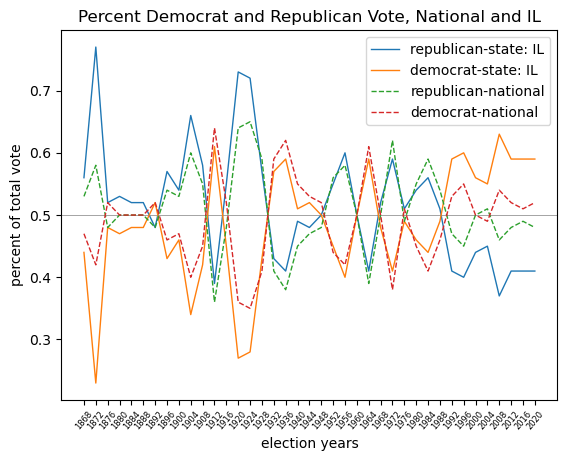

In [304]:
state = 'IL'
collection = deepElectionResults
electionDict = election_2020
plt = plotProportionalVoteByPartyForOneState(collection, electionDict, state)
plt.show